# Two groups

## Enter your data

### Import / Create Dataset

In [37]:
#install.packages('dplyr')
#install.packages('tidyr')
#install.packages('dabestr')

In [38]:
library(dplyr)

set.seed(54321)

N = 30
control <- rnorm(N, mean = 0, sd = 1)
test <- rnorm(N, mean = 0.5, sd = 1)


wide.data <- 
  tibble::tibble(
    Control = control, Test = test)


my.data   <- 
  wide.data %>%
  tidyr::gather(key = Group, value = Measurement)

head(my.data)

Group,Measurement
<chr>,<dbl>
Control,-0.1789007
Control,-0.9280441
Control,-0.7840337
Control,-1.6506005
Control,-0.4080665
Control,-1.0955294


## Select the width of the confidence interval

In [39]:
ci <- 90

## Select type of analysis

In [40]:
paired <- FALSE

## Load Data

In [41]:
library(dabestr)
my_dabest_object <- 
  my.data %>%
  dabest(Group, Measurement, 
         idx = c("Control", "Test"), 
         paired = paired)

## Choose your effect size

### Mean difference

In [42]:
my_dabest_object.mean_diff <- mean_diff(my_dabest_object)
my_dabest_object.meandiff

dabestr (Data Analysis with Bootstrap Estimation in R) v0.3.0

Good morning!
The current time is 09:49 AM on Thursday January 20, 2022.

Dataset    :  .
X Variable :  Group
Y Variable :  Measurement

Unpaired mean difference of Test (n = 30) minus Control (n = 30)
 0.208 [95CI  -0.301; 0.739]


5000 bootstrap resamples.
All confidence intervals are bias-corrected and accelerated.


### Cohens' d

In [43]:
my_dabest_object.cohens_d <- cohens_d(my_dabest_object)
my_dabest_object.cohens_d

dabestr (Data Analysis with Bootstrap Estimation in R) v0.3.0

Good morning!
The current time is 09:49 AM on Thursday January 20, 2022.

Dataset    :  .
X Variable :  Group
Y Variable :  Measurement

Unpaired Cohen's d of Test (n = 30) minus Control (n = 30)
 0.195 [95CI  -0.295; 0.721]


5000 bootstrap resamples.
All confidence intervals are bias-corrected and accelerated.


### Hedges’ g

In [44]:
my_dabest_object.hedges_g <- hedges_g(my_dabest_object)
my_dabest_object.hedges_g

dabestr (Data Analysis with Bootstrap Estimation in R) v0.3.0

Good morning!
The current time is 09:49 AM on Thursday January 20, 2022.

Dataset    :  .
X Variable :  Group
Y Variable :  Measurement

Unpaired Hedges' g of Test (n = 30) minus Control (n = 30)
 0.193 [95CI  -0.291; 0.711]


5000 bootstrap resamples.
All confidence intervals are bias-corrected and accelerated.


### cliffs_delta

In [45]:
my_dabest_object.cliffs_delta <- cliffs_delta(my_dabest_object)
my_dabest_object.cliffs_delta

dabestr (Data Analysis with Bootstrap Estimation in R) v0.3.0

Good morning!
The current time is 09:49 AM on Thursday January 20, 2022.

Dataset    :  .
X Variable :  Group
Y Variable :  Measurement

Unpaired Cliff's delta of Test (n = 30) minus Control (n = 30)
 0.0756 [95CI  -0.22; 0.378]


5000 bootstrap resamples.
All confidence intervals are bias-corrected and accelerated.


## Plot

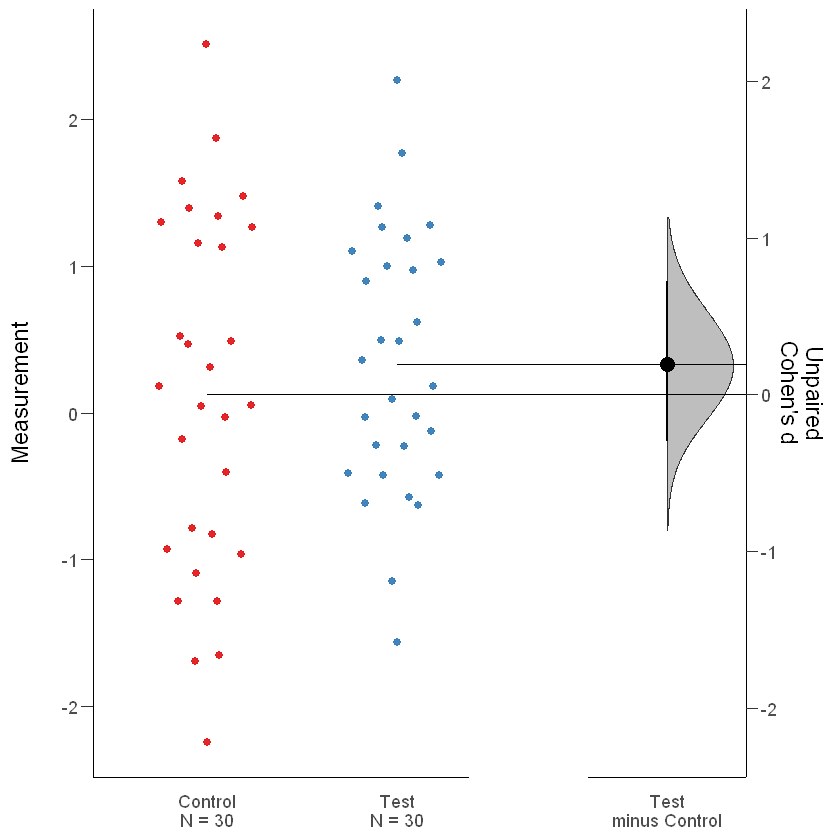

In [46]:
plot(my_dabest_object.cohens_d)